In [1]:
# Homework 6 Template
# G. Besla & R. Li

In [2]:
# import modules
import numpy as np
import astropy.units as u
from astropy.constants import G

# import plotting modules
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

# my modules
from ReadFile import Read
# Step 1: modify CenterOfMass so that COM_P now takes a parameter specifying 
# by how much to decrease RMAX instead of a factor of 2
from CenterOfMass2 import CenterOfMass

from tqdm import tqdm

In [3]:
def OrbitCOM(galaxy, start, end, n):
    """function that loops over all the desired snapshots to compute the COM pos and vel as a function of time.
    inputs:
          galaxy: 'str' name of the galaxy, e.g. 'MW'
          start:  'int' Number of the first snapshot to read in
          end:    'int' Number of the last snapshot to read in
          n:      'int' integer indicating the intervals over which to return the COM
    outputs: 
          file that stores the time of the snap number, the xyz position and vx, vy,vz velocities of the Center of Mass
          for every snap number specified.
    """
    
    # compose the filename for output
    fileout = f"Orbit_{galaxy}.txt"
    
    #  set tolerance and VolDec for calculating COM_P in CenterOfMass
    # for M33 that is stripped more, use different values for VolDec
    delta = 0.1
    if galaxy == 'M33':
        volDec = 4.0
    else:
        volDec = 2.0

    # generate the snapshot id sequence 
    # it is always a good idea to also check if the input is eligible (not required)  
    snap_ids = np.arange(start, end+1, n, dtype=int)
    if snap_ids.size == 0:
        print("Incorect start, end, or n values.")
        return
    
    # initialize the array for orbital info: t, x, y, z, vx, vy, vz of COM
    orbit = np.zeros([snap_ids.size, 7])
    
    # a for loop 
    for  i, snap_id in enumerate(tqdm(snap_ids)): # loop over files
        
        # compose the data filename (be careful about the folder)
        filename = f"VLowRes/{galaxy}/{galaxy}_{snap_id:03}.txt"
        # Initialize an instance of CenterOfMass class, using disk particles
        COM = CenterOfMass(filename, 2)

        # Store the COM pos and vel. Remember that now COM_P required VolDec
        COM_P = COM.COM_P(delta = delta, volDec = volDec)
        COM_V = COM.COM_V(*COM_P)
    
        # store the time, pos, vel in ith element of the orbit array,  without units (.value) 
        # note that you can store 
        # a[i] = var1, *tuple(array1)
        orbit[i] = COM.time.value/1000, *COM_P.value, *COM_V.value

        # print snap_id to see the progress
        # print(snap_id)

    # write the data to a file
    # we do this because we don't want to have to repeat this process 
    # this code should only have to be called once per galaxy.
    np.savetxt(fileout, orbit, fmt = "%11.3f"*7, comments='#',
               header="{:>10s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}{:>11s}"\
                      .format('t', 'x', 'y', 'z', 'vx', 'vy', 'vz'))

In [4]:
# Recover the orbits and generate the COM files for each galaxy
# read in 800 snapshots in intervals of n=5
# Note: This might take a little while - test your code with a smaller number of snapshots first! 
# OrbitCOM('MW', 0, 800, 5)

In [5]:
# Generate the file for M31
# OrbitCOM('M31', 0, 800, 5)

In [6]:
# Generate the file for M33
# OrbitCOM('M33', 0, 800, 5)

In [7]:
# Read in the data files for the orbits of each galaxy that you just created
# headers:  t, x, y, z, vx, vy, vz
# using np.genfromtxt
orbit_MW = np.genfromtxt('Orbit_MW.txt', names=True)
orbit_M31 = np.genfromtxt('Orbit_M31.txt', names=True)
orbit_M33 = np.genfromtxt('Orbit_M33.txt', names=True)

In [8]:
# Convert the genfromtxt arrays to standard ndarrays
# Get the Milky Way position and velocity arrays
orbit_MW_pos = np.column_stack((orbit_MW['x'], orbit_MW['y'], orbit_MW['z']))
orbit_MW_vel = np.column_stack((orbit_MW['vx'], orbit_MW['vy'], orbit_MW['vz']))

In [9]:
# Convert the genfromtxt arrays to standard ndarrays
# Get the M31 position and velocity arrays
orbit_M31_pos = np.column_stack((orbit_M31['x'], orbit_M31['y'], orbit_M31['z']))
orbit_M31_vel = np.column_stack((orbit_M31['vx'], orbit_M31['vy'], orbit_M31['vz']))

In [10]:
# Convert the genfromtxt arrays to standard ndarrays
# Get the M33 position and velocity arrays
orbit_M33_pos = np.column_stack((orbit_M33['x'], orbit_M33['y'], orbit_M33['z']))
orbit_M33_vel = np.column_stack((orbit_M33['vx'], orbit_M33['vy'], orbit_M33['vz']))

In [11]:
# function to compute the magnitude of the difference between two vectors 
# You can use this function to return both the relative position and relative velocity for two 
# galaxies over the entire orbit 

In [12]:
# Determine the magnitude of the relative position and velocities 
# of MW and M31
sep_MW_M31 = np.linalg.norm(orbit_MW_pos - orbit_M31_pos, axis=1)
vel_MW_M31 = np.linalg.norm(orbit_MW_vel - orbit_M31_vel, axis=1)

# of M33 and M31
sep_M31_M33 = np.linalg.norm(orbit_M31_pos - orbit_M33_pos, axis=1)
vel_M31_M33 = np.linalg.norm(orbit_M31_vel - orbit_M33_vel, axis=1)

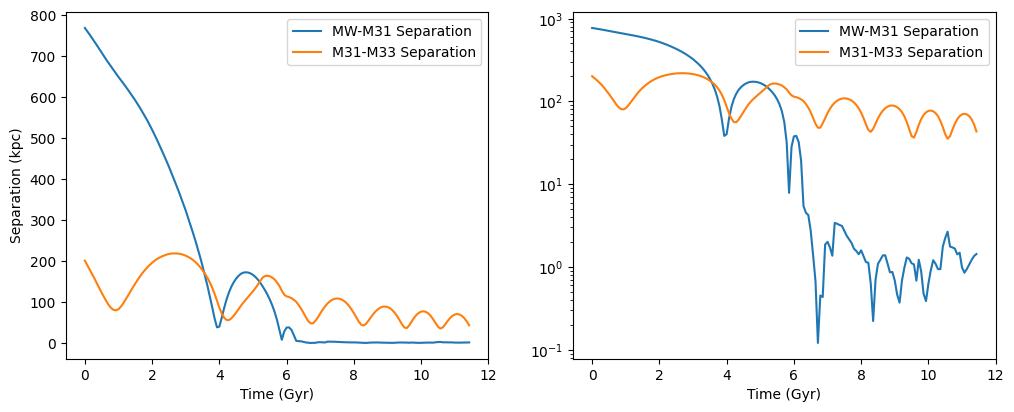

In [13]:
# Plot the Orbit of the galaxies 
#################################
fig, ax = plt.subplots(1, 2, figsize=(12 ,4.5))
ax[0].plot(orbit_MW['t'], sep_MW_M31, label="MW-M31 Separation")
ax[0].plot(orbit_M31['t'], sep_M31_M33, label="M31-M33 Separation")
ax[0].set_xlabel('Time (Gyr)')
ax[0].set_ylabel('Separation (kpc)')
ax[0].legend()

ax[1].semilogy(orbit_MW['t'], sep_MW_M31, label="MW-M31 Separation")
ax[1].semilogy(orbit_M31['t'], sep_M31_M33, label="M31-M33 Separation")
ax[1].set_xlabel('Time (Gyr)')
ax[1].legend()
plt.show()


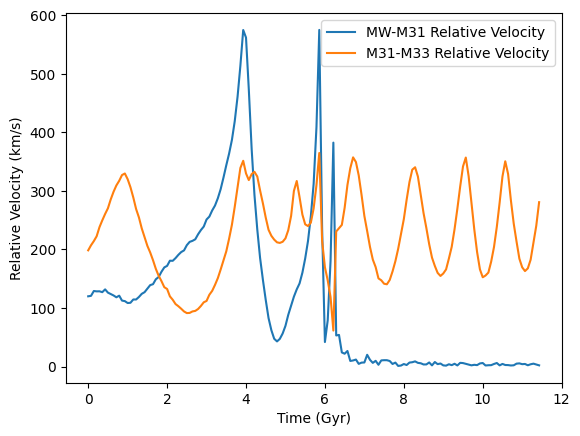

In [14]:
# Plot the orbital velocities of the galaxies 
#################################
fig, ax = plt.subplots()
ax.plot(orbit_MW['t'], vel_MW_M31, label="MW-M31 Relative Velocity")
ax.plot(orbit_M31['t'], vel_M31_M33, label="M31-M33 Relative Velocity")
ax.set_xlabel('Time (Gyr)')
ax.set_ylabel('Relative Velocity (km/s)')
ax.legend()
plt.show()

# Questions

1. How many close encounters will the MW and M31 experience in the future?

They will experience two close encounters in the future, where the next "close encounter" leads to their merger.

2. How is the time evolution of the separation and relative velocity related?

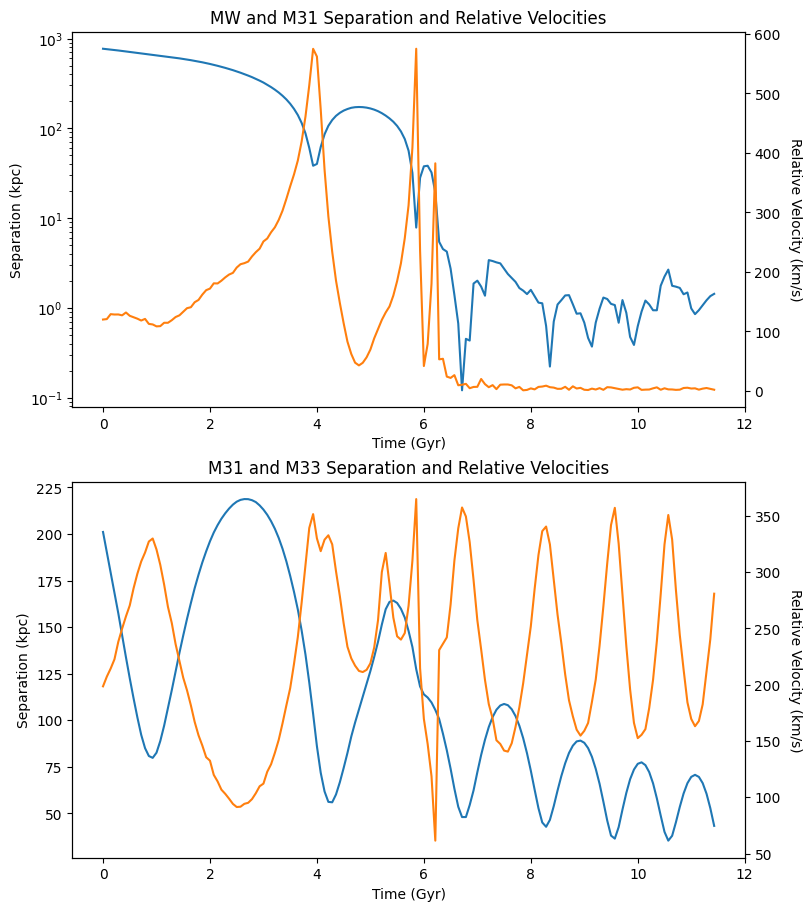

In [15]:
fig, ax = plt.subplots(2, 1, figsize=(8, 9), layout='constrained')
ax[0].semilogy(orbit_MW['t'], sep_MW_M31)
ax[0].set_xlabel('Time (Gyr)')
ax[0].set_ylabel('Separation (kpc)')
ax[0].set_title('MW and M31 Separation and Relative Velocities')

ax2 = ax[0].twinx()
ax2.plot(orbit_MW['t'], vel_MW_M31, c='C1')
ax2.set_ylabel('Relative Velocity (km/s)', rotation=270, labelpad=15)

ax[1].plot(orbit_M31['t'], sep_M31_M33)
ax[1].set_xlabel('Time (Gyr)')
ax[1].set_ylabel('Separation (kpc)')
ax[1].set_title('M31 and M33 Separation and Relative Velocities')

ax3 = ax[1].twinx()
ax3.plot(orbit_M31['t'], vel_M31_M33, c='C1')
ax3.set_ylabel('Relative Velocity (km/s)', rotation=270, labelpad=15)
plt.show()

When the separations are at a minimum the velocities are at a maximum. As well, when the separations are at a maximum the velocities are at a minimum. This can be seen in the plots above.

3. When do M31 and the MW merge? (you might need to zoom in on the plot - try a log y-axis). What happens to M33's orbit when they merge?

M31 and MW merge at approximately $6\;Gyr$. M33's orbit becomes relatively stable at about this time, the M31 and M33 separation graph becomes essentially sinusoidal, while decaying slightly.

4. BONUS: What is roughly the decay rate of M33's orbit after $6\;Gyr$ (ratio of the difference between two successive apocenters and the orbital period; you don't need to be precise). If this rate is constant, how long will it take M33 to merge with the combined MW+M31 remnant if it is at a distance of $75\;kpc$?